In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



In [66]:
#from google.colab import drive
#drive.mount('/content/drive')


In [67]:
bene_path = "DE1_0_2009_Beneficiary_Summary_File_Sample_20.csv"
out_path  = "DE1_0_2008_to_2010_Outpatient_Claims_Sample_20.csv"

# Check files exist
if not os.path.exists(bene_path):
    raise FileNotFoundError("Beneficiary file not found. Check Drive path.")

if not os.path.exists(out_path):
    raise FileNotFoundError("Outpatient file not found. Check Drive path.")

# Load data
bene = pd.read_csv(bene_path)
out  = pd.read_csv(out_path, low_memory=False)

print("bene:", bene.shape)
print("out :", out.shape)

bene.head()

bene: (114641, 32)
out : (790044, 76)


,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,000002F7E0A96C32,19190701,NaN,2,2,0,5,400,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00001C24EE7B06AC,19360501,NaN,1,1,0,11,530,12,12,...,2,0.0,0.0,0.0,200.0,40.0,0.0,800.0,260.0,0.0
2,000072CF62193213,19310401,NaN,2,1,0,34,120,12,12,...,2,0.0,0.0,0.0,130.0,70.0,0.0,440.0,30.0,50.0
3,0000DCD33779ED8A,19420501,NaN,2,2,0,11,190,12,12,...,2,0.0,0.0,0.0,90.0,20.0,0.0,930.0,200.0,0.0
4,0000F1EB530967F3,19350401,NaN,2,1,0,23,720,12,12,...,2,0.0,0.0,0.0,70.0,200.0,0.0,4950.0,1340.0,0.0


In [68]:
# Convert date columns to datetime
date_cols_bene = ["BENE_BIRTH_DT", "BENE_DEATH_DT"]

#convert beneficiary birth/death dates from YYYYMMDD to datetime
for c in date_cols_bene:
    bene[c] = pd.to_datetime(
        bene[c],
        format="%Y%m%d",
        errors="coerce"
    )

date_cols_out = ["CLM_FROM_DT", "CLM_THRU_DT"]

# Convert claim start/end dates from YYYYMMDD to datetime
for c in date_cols_out:
    out[c] = pd.to_datetime(
        out[c],
        format="%Y%m%d",
        errors="coerce"
    )




In [69]:
bene.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,000002F7E0A96C32,1919-07-01,NaT,2,2,0,5,400,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00001C24EE7B06AC,1936-05-01,NaT,1,1,0,11,530,12,12,...,2,0.0,0.0,0.0,200.0,40.0,0.0,800.0,260.0,0.0
2,000072CF62193213,1931-04-01,NaT,2,1,0,34,120,12,12,...,2,0.0,0.0,0.0,130.0,70.0,0.0,440.0,30.0,50.0
3,0000DCD33779ED8A,1942-05-01,NaT,2,2,0,11,190,12,12,...,2,0.0,0.0,0.0,90.0,20.0,0.0,930.0,200.0,0.0
4,0000F1EB530967F3,1935-04-01,NaT,2,1,0,23,720,12,12,...,2,0.0,0.0,0.0,70.0,200.0,0.0,4950.0,1340.0,0.0


In [70]:
#Compute age based on birth year (approximate; assumes analysis year = 2009)
bene["age"] = 2009 - bene["BENE_BIRTH_DT"].dt.year


In [71]:
bene[["BENE_BIRTH_DT","age"]].head(10)


,BENE_BIRTH_DT,age
0,1919-07-01,90
1,1936-05-01,73
2,1931-04-01,78
3,1942-05-01,67
4,1935-04-01,74
5,1941-08-01,68
6,1943-10-01,66
7,1943-09-01,66
8,1942-09-01,67
9,1943-12-01,66


In [72]:
# Convert physician NPI to nullable integer to handle missing values cleanly
out["AT_PHYSN_NPI"] = out["AT_PHYSN_NPI"].astype("Int64")

present_out = out[[
    "DESYNPUF_ID",
    "CLM_FROM_DT",
    "CLM_THRU_DT",
    "CLM_PMT_AMT",
    "AT_PHYSN_NPI"
]].copy()


present_out["CLM_PMT_AMT"] = present_out["CLM_PMT_AMT"].map("{:,.0f}".format)

present_out.head()


,DESYNPUF_ID,CLM_FROM_DT,CLM_THRU_DT,CLM_PMT_AMT,AT_PHYSN_NPI
0,00001C24EE7B06AC,2009-04-04,2009-04-04,200,1298826910
1,00001C24EE7B06AC,2010-03-10,2010-03-10,500,1298826910
2,000072CF62193213,2008-01-30,2008-01-30,50,8929521324
3,000072CF62193213,2008-03-01,2008-03-01,70,8382687693
4,000072CF62193213,2008-03-22,2008-03-22,40,4404237062


In [73]:
bene[["DESYNPUF_ID","BENE_RACE_CD"]].isna().mean()
out[["DESYNPUF_ID","AT_PHYSN_NPI","CLM_PMT_AMT"]].isna().mean()


,0
DESYNPUF_ID,0.000000
AT_PHYSN_NPI,0.022075
CLM_PMT_AMT,0.000000


In [74]:
chronic_cols = [
    "SP_ALZHDMTA","SP_CHF","SP_CHRNKIDN","SP_CNCR","SP_COPD",
    "SP_DEPRESSN","SP_DIABETES","SP_ISCHMCHT","SP_OSTEOPRS","SP_RA_OA","SP_STRKETIA"
]

pretty = {
    "SP_ALZHDMTA":"Alzheimer",
    "SP_CHF":"CHF",
    "SP_CHRNKIDN":"Chronic Kidney",
    "SP_CNCR":"Cancer",
    "SP_COPD":"COPD",
    "SP_DEPRESSN":"Depression",
    "SP_DIABETES":"Diabetes",
    "SP_ISCHMCHT":"Ischemic Heart",
    "SP_OSTEOPRS":"Osteoporosis",
    "SP_RA_OA":"RA/OA",
    "SP_STRKETIA":"Stroke/TIA",
}


In [75]:
# - "None" if no chronic conditions
# - "Multiple" if 3+ conditions
# - otherwise join the condition names (e.g., "Diabetes + COPD")

def chronic_combo(row):
    yes = [pretty[c] for c in chronic_cols if row[c] == 1]

    if len(yes) == 0:
        return "None"
    elif len(yes) >= 3:
        return "Multiple"
    else:
        return " + ".join(yes)



In [76]:
# Apply chronic condition grouping to every beneficiary
bene["chronic_combo"] = bene.apply(chronic_combo, axis=1)


In [77]:
# Count number of chronic conditions per member
bene["chronic_count"] = (bene[chronic_cols] == 1).sum(axis=1)

bene["chronic_count"].value_counts()


,count
chronic_count,
0,36984
1,12959
2,12874
3,12695
4,11475
5,9811
6,7676
7,5449
8,3087


In [78]:
bene["chronic_combo"].value_counts().head(10)


,count
chronic_combo,
Multiple,51824
None,36984
Ischemic Heart,4167
Diabetes + Ischemic Heart,2043
Diabetes,1928
CHF,1490
Depression,1485
CHF + Ischemic Heart,1469
Osteoporosis,1163


In [79]:
df = out.merge(
    bene[["DESYNPUF_ID","BENE_RACE_CD","chronic_combo"]],
    on="DESYNPUF_ID",
    how="left"
)




In [80]:
df.shape

(790044, 78)

In [81]:
df["chronic_combo"].isna().mean()

np.float64(0.002525175812992694)

In [82]:
# Use claim payment amount as cost
df["cost"] = df["CLM_PMT_AMT"]

In [83]:
df = df[df["cost"] > 0]


In [84]:
# Race distribution (member-level)
race_map = {
    1: "White",
    2: "Black",
    3: "Other",
    5: "Hispanic"
}
# Percent distribution of beneficiaries by race code
race_dist = (
    bene["BENE_RACE_CD"]
      .value_counts(normalize=True)
      .mul(100)
      .round(1)
      .rename("% of Members")
      .reset_index()
)

race_dist["Race"] = race_dist["BENE_RACE_CD"].map(race_map)


race_dist = race_dist[["BENE_RACE_CD","Race","% of Members"]]

race_dist


,BENE_RACE_CD,Race,% of Members
0,1,White,82.8
1,2,Black,10.6
2,3,Other,4.3
3,5,Hispanic,2.3


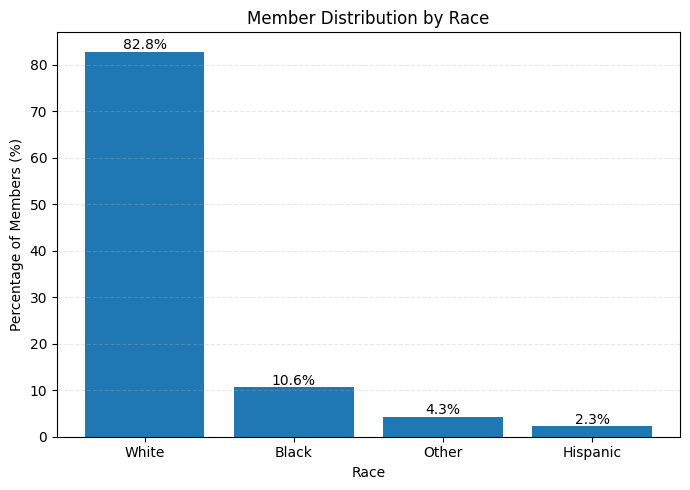

In [85]:
# Plot: Member distribution by race
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

plt.bar(
    race_dist["Race"],
    race_dist["% of Members"]
)

plt.title("Member Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Percentage of Members (%)")

plt.grid(axis="y", linestyle="--", alpha=0.3)

# Add labels on top of bars
for i, v in enumerate(race_dist["% of Members"]):
    plt.text(i, v + 0.5, f"{v}%", ha="center")

plt.tight_layout()
plt.show()


In [86]:
# Chronic condition: counts and total cost

combo_counts = bene["chronic_combo"].value_counts()

combo_counts.apply(lambda x: f"{x:,}")


,count
chronic_combo,
Multiple,"51,824"
None,"36,984"
Ischemic Heart,"4,167"
Diabetes + Ischemic Heart,"2,043"
Diabetes,"1,928"
...,...
Osteoporosis + Stroke/TIA,14
Chronic Kidney + Stroke/TIA,12
RA/OA + Stroke/TIA,7


In [87]:
# Total cost by chronic condition group (top 10)
total_cost = (
    df.groupby("chronic_combo")["cost"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

total_cost.apply(lambda x: f"{int(x):,}")


,cost
chronic_combo,
Multiple,"182,443,290"
None,"7,759,770"
Ischemic Heart,"4,337,010"
Diabetes + Ischemic Heart,"3,102,270"
Diabetes,"2,361,460"
CHF + Ischemic Heart,"1,992,030"
Depression,"1,467,320"
CHF,"1,231,940"
Depression + Ischemic Heart,"1,155,670"


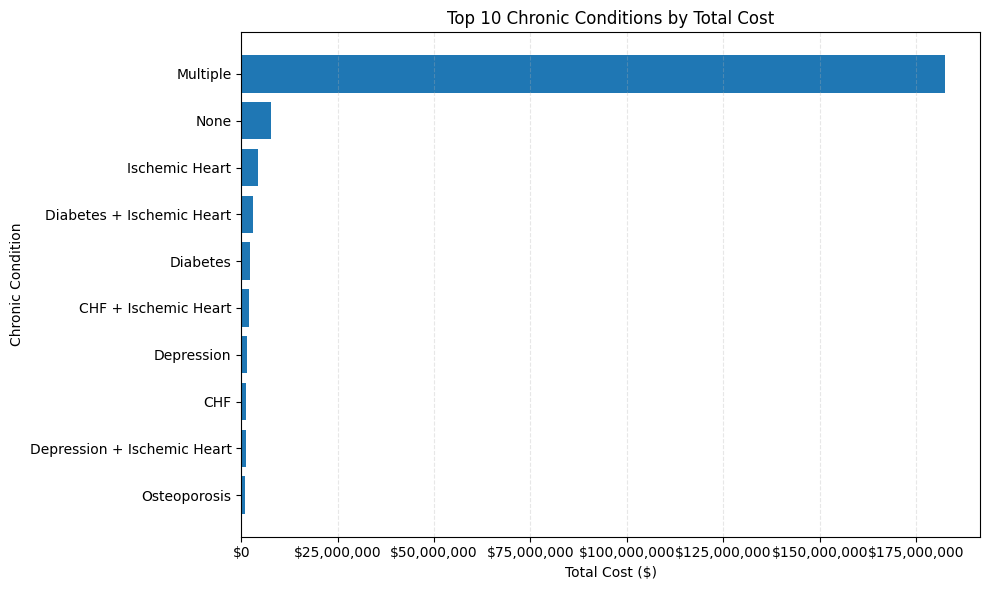

In [88]:
# Plot: Top 10 chronic groups by total cost
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))

# Horizontal bar chart
plt.barh(
    total_cost.index,
    total_cost.values
)

plt.gca().invert_yaxis()  # highest on top

plt.title("Top 10 Chronic Conditions by Total Cost")
plt.xlabel("Total Cost ($)")
plt.ylabel("Chronic Condition")

# Format dollars
plt.gca().xaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

plt.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


In [89]:
# Cost per member by chronic group
combo_pm = (
    df.groupby("chronic_combo")
      .agg(total_cost=("cost","sum"),
           members=("DESYNPUF_ID","nunique"))
)

combo_pm["cost_per_member"] = combo_pm["total_cost"] / combo_pm["members"]

# Format columns for readability
combo_pm["total_cost"] = combo_pm["total_cost"].round().astype(int).map("{:,}".format)
combo_pm["members"] = combo_pm["members"].map("{:,}".format)
combo_pm["cost_per_member"] = combo_pm["cost_per_member"].round(2).map("{:,.2f}".format)

combo_pm.sort_values("cost_per_member", ascending=False).head(10)


,total_cost,members,cost_per_member
chronic_combo,,,
Chronic Kidney + Osteoporosis,"42,520",44,966.36
None,"7,759,770","10,759",721.24
Multiple,"182,443,290","50,617","3,604.39"
Chronic Kidney + Diabetes,"631,600",235,"2,687.66"
Cancer + Osteoporosis,"180,360",78,"2,312.31"
RA/OA + Stroke/TIA,"12,880",6,"2,146.67"
Chronic Kidney + RA/OA,"33,840",16,"2,115.00"
Cancer + COPD,"35,920",17,"2,112.94"
CHF + Stroke/TIA,"42,500",21,"2,023.81"


In [90]:
df_prov = df.dropna(subset=["AT_PHYSN_NPI"]).copy()


In [91]:
# Aggregate cost and unique members by (chronic group, provider)
prov_combo = (
    df_prov.groupby(["chronic_combo", "AT_PHYSN_NPI"])
      .agg(total_cost=("cost", "sum"),
           members=("DESYNPUF_ID", "nunique"))
      .reset_index()
)

# Compute provider cost per member within each chronic group
prov_combo["cost_per_member"] = prov_combo["total_cost"] / prov_combo["members"]


prov_head = prov_combo.head().copy()

prov_head["AT_PHYSN_NPI"] = prov_head["AT_PHYSN_NPI"].astype("int64").map("{:,}".format)
prov_head["total_cost"] = prov_head["total_cost"].round().astype(int).map("{:,}".format)
prov_head["members"] = prov_head["members"].astype(int).map("{:,}".format)
prov_head["cost_per_member"] = prov_head["cost_per_member"].round().astype(int).map("{:,}".format)

prov_head


,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member
0,Alzheimer,"1,814,011",50,1,50
1,Alzheimer,"3,873,846",100,1,100
2,Alzheimer,"4,834,561",30,1,30
3,Alzheimer,"7,369,113",100,1,100
4,Alzheimer,"9,041,694",60,1,60


In [92]:
prov_combo["chronic_combo"].unique()


array(['Alzheimer', 'Alzheimer + CHF', 'Alzheimer + COPD',
       'Alzheimer + Cancer', 'Alzheimer + Chronic Kidney',
       'Alzheimer + Depression', 'Alzheimer + Diabetes',
       'Alzheimer + Ischemic Heart', 'Alzheimer + Osteoporosis',
       'Alzheimer + RA/OA', 'Alzheimer + Stroke/TIA', 'CHF', 'CHF + COPD',
       'CHF + Cancer', 'CHF + Chronic Kidney', 'CHF + Depression',
       'CHF + Diabetes', 'CHF + Ischemic Heart', 'CHF + Osteoporosis',
       'CHF + RA/OA', 'CHF + Stroke/TIA', 'COPD', 'COPD + Depression',
       'COPD + Diabetes', 'COPD + Ischemic Heart', 'COPD + Osteoporosis',
       'COPD + RA/OA', 'COPD + Stroke/TIA', 'Cancer', 'Cancer + COPD',
       'Cancer + Depression', 'Cancer + Diabetes',
       'Cancer + Ischemic Heart', 'Cancer + Osteoporosis',
       'Cancer + RA/OA', 'Cancer + Stroke/TIA', 'Chronic Kidney',
       'Chronic Kidney + COPD', 'Chronic Kidney + Cancer',
       'Chronic Kidney + Depression', 'Chronic Kidney + Diabetes',
       'Chronic Kidney + Isch

In [93]:
# Sampling provider rows for quick inspection
sample_prov = prov_combo.sample(5).copy()


sample_prov["AT_PHYSN_NPI"] = sample_prov["AT_PHYSN_NPI"].astype("int64").map("{:,}".format)
sample_prov["total_cost"] = sample_prov["total_cost"].round().astype(int).map("{:,}".format)
sample_prov["members"] = sample_prov["members"].astype(int).map("{:,}".format)
sample_prov["cost_per_member"] = sample_prov["cost_per_member"].round().astype(int).map("{:,}".format)

sample_prov



,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member
36921,Cancer + Ischemic Heart,"5,718,120,376",70,1,70
144423,Multiple,"6,405,742,390","4,790",21,228
139801,Multiple,"5,873,856,970","4,920",3,"1,640"
165029,Multiple,"8,791,288,974","23,440",74,317
122216,Multiple,"3,819,084,383",200,1,200


In [94]:
# Top providers by cost per member (any chronic group)
top_prov = prov_combo.sort_values("cost_per_member", ascending=False).head().copy()


top_prov["AT_PHYSN_NPI"] = top_prov["AT_PHYSN_NPI"].astype("int64").map("{:,}".format)
top_prov["total_cost"] = top_prov["total_cost"].round().astype(int).map("{:,}".format)
top_prov["members"] = top_prov["members"].astype(int).map("{:,}".format)
top_prov["cost_per_member"] = top_prov["cost_per_member"].round().astype(int).map("{:,}".format)

top_prov


,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member
41107,Chronic Kidney + Diabetes,"9,943,567,290","20,460",1,"20,460"
40470,Chronic Kidney + Diabetes,"5,340,785,586","9,860",1,"9,860"
5327,Alzheimer + Chronic Kidney,"6,324,110,378","8,450",1,"8,450"
85088,Ischemic Heart + Osteoporosis,"4,434,265,417","7,920",1,"7,920"
196578,RA/OA,"2,371,639,354","7,680",1,"7,680"


In [95]:
# Distribution stats per chronic group (provider cost/member)
dist_stats = (
    prov_combo.groupby("chronic_combo")["cost_per_member"]
      .agg(providers="count",
           mean="mean",
           median="median",
           p90=lambda s: s.quantile(0.90),
           p95=lambda s: s.quantile(0.95))
      .sort_values("p95", ascending=False)
      .round(0)
      .rename(columns={
          "providers":"# Providers",
          "mean":"Avg Cost/Member",
          "median":"Median Cost",
          "p90":"P90 Cost",
          "p95":"P95 Cost"
      })
)


for col in ["Avg Cost/Member","Median Cost","P90 Cost","P95 Cost"]:
    dist_stats[col] = dist_stats[col].map(lambda x: f"{int(x):,}")

dist_stats.head(10)


,# Providers,Avg Cost/Member,Median Cost,P90 Cost,P95 Cost
chronic_combo,,,,,
Chronic Kidney + Stroke/TIA,33,425,80,800,"3,060"
Osteoporosis + Stroke/TIA,44,346,100,670,"2,120"
Chronic Kidney,1081,389,90,"1,160","2,100"
Chronic Kidney + Diabetes,1344,405,100,"1,074","2,000"
Cancer,1363,339,90,900,"1,745"
Cancer + Osteoporosis,516,321,90,800,"1,612"
Chronic Kidney + Ischemic Heart,1238,310,90,800,"1,600"
Diabetes + Stroke/TIA,285,309,80,700,"1,600"
CHF + Chronic Kidney,522,323,90,800,"1,597"


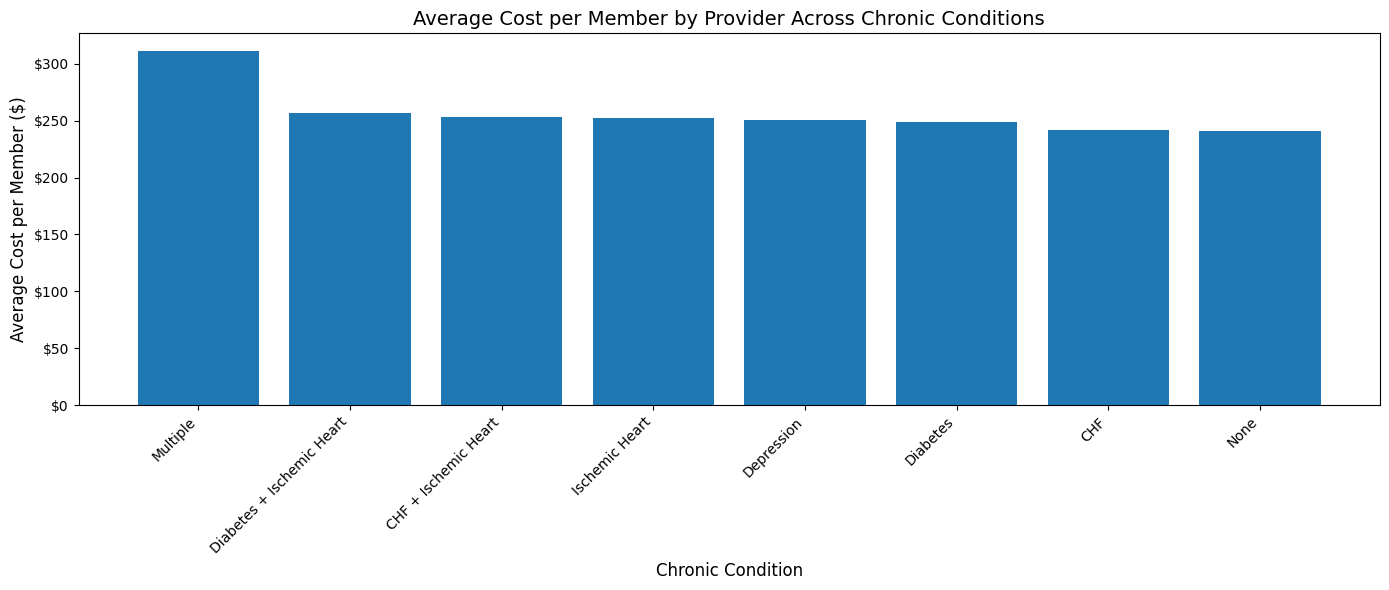

In [96]:
# Plot: Average provider cost per member by chronic condition
# (using top 8 chronic combos by volume)
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

top_combos = bene["chronic_combo"].value_counts().head(8).index

tmp = prov_combo[
    prov_combo["chronic_combo"].isin(top_combos)
].copy()

# 🔹 Aggregate to ONE value per condition
bar_data = (
    tmp.groupby("chronic_combo")["cost_per_member"]
        .mean()                 # change to .median() if preferred
        .sort_values(ascending=False)
)

plt.figure(figsize=(14,6))

plt.bar(bar_data.index, bar_data.values)

plt.xticks(rotation=45, ha="right")

plt.title("Average Cost per Member by Provider Across Chronic Conditions", fontsize=14)
plt.xlabel("Chronic Condition", fontsize=12)
plt.ylabel("Average Cost per Member ($)", fontsize=12)

plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

plt.tight_layout()
plt.show()


In [97]:
# Filter to provider-condition pairs with >1 member
# (helps reduce noise from single-patient providers)
prov_combo_2plus = prov_combo[prov_combo["members"] > 1].copy()



In [98]:
# Distribution stats on the 2+ member subset
dist_stats_2plus = (
    prov_combo_2plus.groupby("chronic_combo")["cost_per_member"]
      .agg(
          providers="count",
          mean="mean",
          median="median",
          p90=lambda s: s.quantile(0.90),
          p95=lambda s: s.quantile(0.95)
      )
      .sort_values("p95", ascending=False)
)

# Compare "all" vs "2+ members" side-by-side
comparison = pd.concat(
    [
        dist_stats.add_suffix("_All"),
        dist_stats_2plus.add_suffix("_2+Members")
    ],
    axis=1
)

# Round numeric columns
for col in comparison.columns:
    if "providers" not in col:
        comparison[col] = comparison[col].round(0)


comparison = comparison.fillna("—")

# Convert numeric-looking values to ints for cleaner display
for col in comparison.columns:
    if "providers" not in col:
        comparison[col] = comparison[col].apply(
            lambda x: int(x) if isinstance(x,(int,float)) else x
        )


comparison["providers_2+Members"] = comparison["providers_2+Members"].apply(
    lambda x: int(x) if isinstance(x,(int,float)) else x
)

comparison.head(10)


,# Providers_All,Avg Cost/Member_All,Median Cost_All,P90 Cost_All,P95 Cost_All,providers_2+Members,mean_2+Members,median_2+Members,p90_2+Members,p95_2+Members
chronic_combo,,,,,,,,,,
Chronic Kidney + Stroke/TIA,33,425,80,800,"3,060",—,—,—,—,—
Osteoporosis + Stroke/TIA,44,346,100,670,"2,120",—,—,—,—,—
Chronic Kidney,1081,389,90,"1,160","2,100",52,340,139,998,1244
Chronic Kidney + Diabetes,1344,405,100,"1,074","2,000",75,372,195,938,1396
Cancer,1363,339,90,900,"1,745",93,375,207,981,1510
Cancer + Osteoporosis,516,321,90,800,"1,612",13,819,420,1837,2038
Chronic Kidney + Ischemic Heart,1238,310,90,800,"1,600",90,294,170,701,1013
Diabetes + Stroke/TIA,285,309,80,700,"1,600",7,744,155,2225,2427
CHF + Chronic Kidney,522,323,90,800,"1,597",10,762,518,1408,1849


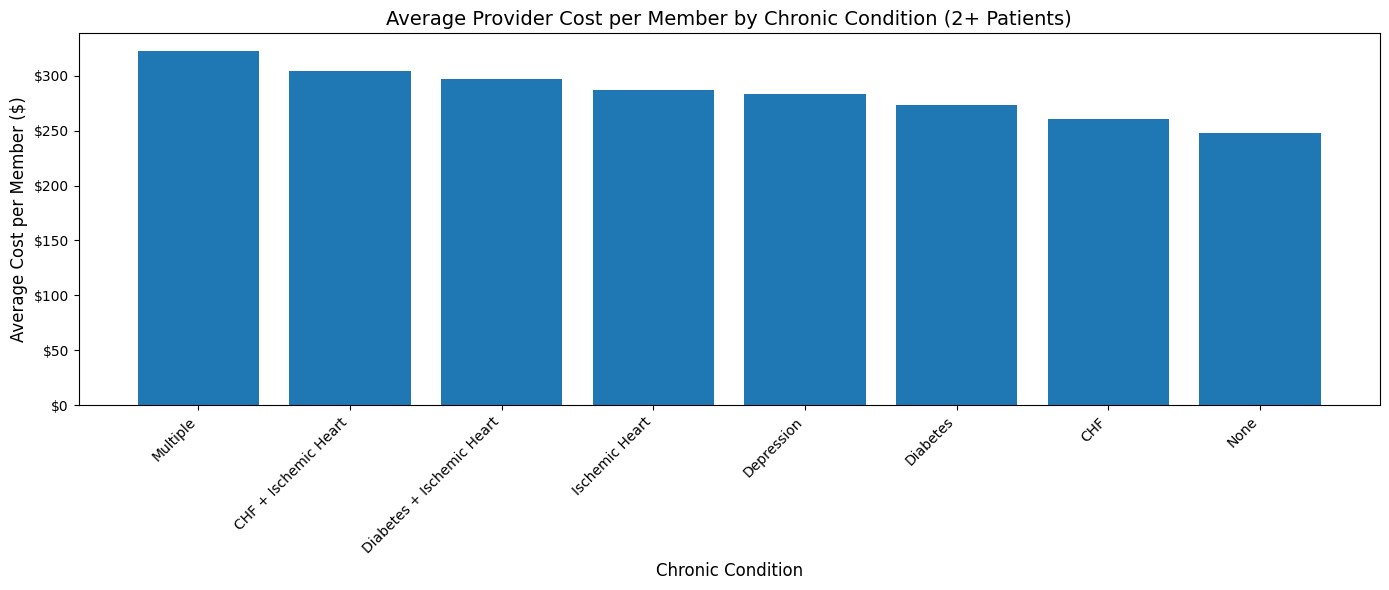

In [99]:
# Plot: Average provider cost/member by condition (2+ patients)
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

tmp2 = prov_combo_2plus[
    prov_combo_2plus["chronic_combo"].isin(top_combos)
]

# Calculate average provider cost per condition
bar_data = (
    tmp2.groupby("chronic_combo")["cost_per_member"]
        .mean()
        .sort_values(ascending=False)
)

plt.figure(figsize=(14,6))

plt.bar(bar_data.index, bar_data.values)

plt.xticks(rotation=45, ha="right")

plt.title("Average Provider Cost per Member by Chronic Condition (2+ Patients)", fontsize=14)
plt.xlabel("Chronic Condition", fontsize=12)
plt.ylabel("Average Cost per Member ($)", fontsize=12)

plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

plt.tight_layout()
plt.show()


In [100]:
# Z-score within each chronic group
# (how extreme a provider’s cost/member is relative to peers in same condition)
if "z_within_combo" not in prov_combo_2plus.columns:
    prov_combo_2plus["z_within_combo"] = (
        prov_combo_2plus
        .groupby("chronic_combo")["cost_per_member"]
        .transform(lambda s: (s - s.mean()) / s.std(ddof=0))
    )


present = prov_combo_2plus.copy()

# Prepare a clean display table (keep numeric types where needed)
present["AT_PHYSN_NPI"] = present["AT_PHYSN_NPI"].astype(int)
present["total_cost"] = present["total_cost"].round(0).astype(int)
present["cost_per_member"] = present["cost_per_member"].round(0).astype(int)
present["z_within_combo"] = present["z_within_combo"].round(2)

present = present.reset_index(drop=True)

present.head()


,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member,z_within_combo
0,Alzheimer,11222535,200,2,100,-0.52
1,Alzheimer,66576833,860,4,215,-0.12
2,Alzheimer,83923847,110,2,55,-0.68
3,Alzheimer,107817142,910,3,303,0.19
4,Alzheimer,124450587,230,2,115,-0.47


In [101]:
# Sanity check: manual Z-score example for Alzheimer group
alz = prov_combo_2plus[
    prov_combo_2plus["chronic_combo"] == "Alzheimer"
]


In [102]:
mean_cost = alz["cost_per_member"].mean()
std_cost = alz["cost_per_member"].std(ddof=0)

mean_cost, std_cost


(np.float64(248.32502707876773), 284.4748518883849)

In [103]:
row = alz.iloc[0]

manual_z = (row["cost_per_member"] - mean_cost) / std_cost

manual_z


np.float64(-0.521399435114088)

In [104]:
# Sample rows for presentation/debugging
sample_tbl = prov_combo_2plus.sample(10).copy()


sample_tbl["AT_PHYSN_NPI"] = sample_tbl["AT_PHYSN_NPI"].astype(int)
sample_tbl["total_cost"] = sample_tbl["total_cost"].round(0).astype(int)
sample_tbl["cost_per_member"] = sample_tbl["cost_per_member"].round(0).astype(int)
sample_tbl["z_within_combo"] = sample_tbl["z_within_combo"].round(2)

sample_tbl


,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member,z_within_combo
155223,Multiple,7647533005,500,2,250,-0.21
165496,Multiple,8842116425,65670,38,1728,4.09
95365,Multiple,698336498,140,3,47,-0.80
76767,Ischemic Heart,3107747795,170,2,85,-0.60
164331,Multiple,8707335283,3320,2,1660,3.89
134764,Multiple,5278357162,160,3,53,-0.78
166515,Multiple,8959825578,4730,3,1577,3.65
93404,Multiple,467658942,110,2,55,-0.78
145478,Multiple,6520589923,3490,4,872,1.60
149094,Multiple,6945943500,300,2,150,-0.50


In [105]:
# Provider scoring across multiple conditions
# - combos_treated: how many distinct chronic groups the provider treated
# - avg_z: average z-score (higher means consistently higher cost within groups)
# - share_high: fraction of groups where provider is > 1 std above mean
provider_score = (
    prov_combo_2plus.groupby("AT_PHYSN_NPI")
      .agg(
          combos_treated=("chronic_combo", "nunique"),
          avg_z=("z_within_combo", "mean"),
          share_high=("z_within_combo", lambda s: (s > 1).mean())
      )
)

# Keep providers with enough breadth (>= 3 conditions treated)
provider_score = (
    provider_score[provider_score["combos_treated"] >= 3]
      .sort_values(["avg_z","share_high","combos_treated"], ascending=False)
)


provider_score.index = provider_score.index.astype(int)
provider_score["avg_z"] = provider_score["avg_z"].round(2)
provider_score["share_high"] = provider_score["share_high"].round(2)

provider_score.head(15)


,combos_treated,avg_z,share_high
AT_PHYSN_NPI,,,
9046763744,3,5.28,1.00
682792263,5,4.59,1.00
8402307293,3,4.15,0.33
3377073031,3,3.84,1.00
8330940486,3,3.48,0.67
2726399145,3,3.29,0.67
6699278362,3,3.26,0.67
8537527591,4,3.12,0.75
2371639354,5,3.03,0.60


In [106]:
p = prov_combo_2plus[
    prov_combo_2plus["AT_PHYSN_NPI"] == 9046763744
]


In [107]:
p["z_within_combo"].mean()


np.float64(5.280279775795145)

In [108]:
provider_score.loc[9046763744]


,9046763744
combos_treated,3.00
avg_z,5.28
share_high,1.00


In [109]:
(p["z_within_combo"] > 1).mean()



np.float64(1.0)

In [110]:
provider_score.loc[9046763744]


,9046763744
combos_treated,3.00
avg_z,5.28
share_high,1.00


In [111]:
# Deep dive: top-ranked provider and their highest z-score combos
top_npi = provider_score.index[0]

tbl = (
    prov_combo_2plus[
        prov_combo_2plus["AT_PHYSN_NPI"] == top_npi
    ]
    .sort_values("z_within_combo", ascending=False)
    .head(10)
    .copy()
)


tbl["AT_PHYSN_NPI"] = tbl["AT_PHYSN_NPI"].astype(int)
tbl["total_cost"] = tbl["total_cost"].round(0).astype(int)
tbl["members"] = tbl["members"].astype(int)
tbl["cost_per_member"] = tbl["cost_per_member"].round(0).astype(int)
tbl["z_within_combo"] = tbl["z_within_combo"].round(2)


tbl = tbl.reset_index(drop=True)

tbl


,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member,z_within_combo
0,Osteoporosis,9046763744,5110,2,2555,6.64
1,Multiple,9046763744,12280,6,2047,5.02
2,None,9046763744,2840,2,1420,4.18


In [112]:
# Cost vs number of chronic conditions
df_cc = df.merge(
    bene[["DESYNPUF_ID","chronic_count"]],
    on="DESYNPUF_ID",
    how="left"
)

cc_cost = (
    df_cc.groupby("chronic_count")["cost"]
         .mean()
         .reset_index()
)

cc_cost["chronic_count"] = cc_cost["chronic_count"].astype(int)
cc_cost["cost"] = cc_cost["cost"].round(0).astype(int)


cc_cost = cc_cost.rename(columns={"cost":"avg_cost"})

cc_cost


,chronic_count,avg_cost
0,0,227
1,1,230
2,2,230
3,3,254
4,4,273
5,5,322
6,6,350
7,7,353
8,8,360
9,9,361


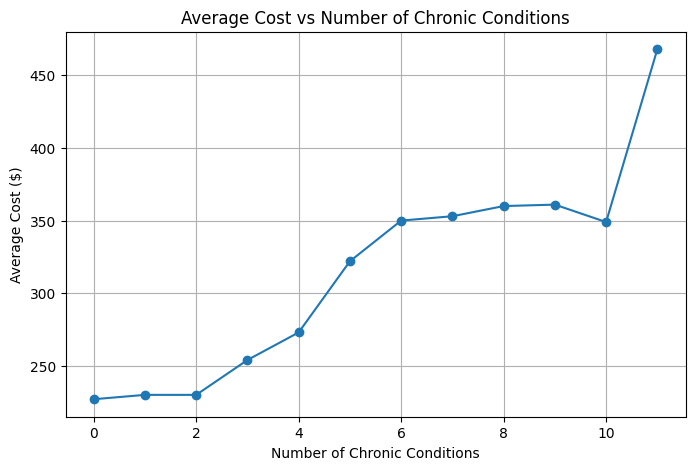

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(
    cc_cost["chronic_count"],
    cc_cost["avg_cost"],
    marker="o"
)

plt.title("Average Cost vs Number of Chronic Conditions")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Average Cost ($)")
plt.grid(True)

plt.show()


In [114]:
# Cost by age group
df_age = df.merge(
    bene[["DESYNPUF_ID","age"]],
    on="DESYNPUF_ID",
    how="left"
)


df_age["age_group"] = pd.cut(
    df_age["age"],
    bins=[65,70,75,80,85,90,100],
    labels=["65-69","70-74","75-79","80-84","85-89","90+"]
)


age_cost = (
    df_age.groupby("age_group")["cost"]
          .mean()
          .reset_index()
)


age_cost["cost"] = age_cost["cost"].round(0).astype(int)


age_cost = age_cost.rename(columns={"cost":"avg_cost"})

age_cost


/tmp/ipython-input-3503799543.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age.groupby("age_group")["cost"]


,age_group,avg_cost
0,65-69,281
1,70-74,290
2,75-79,290
3,80-84,304
4,85-89,300
5,90+,302


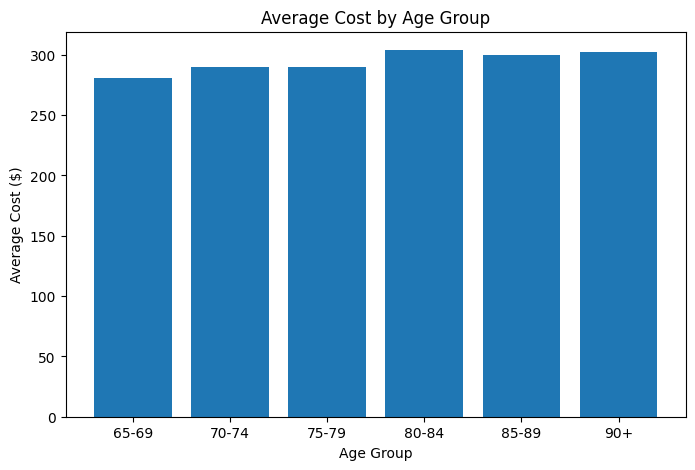

In [115]:
plt.figure(figsize=(8,5))

plt.bar(age_cost["age_group"], age_cost["avg_cost"])

plt.title("Average Cost by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Cost ($)")

plt.show()


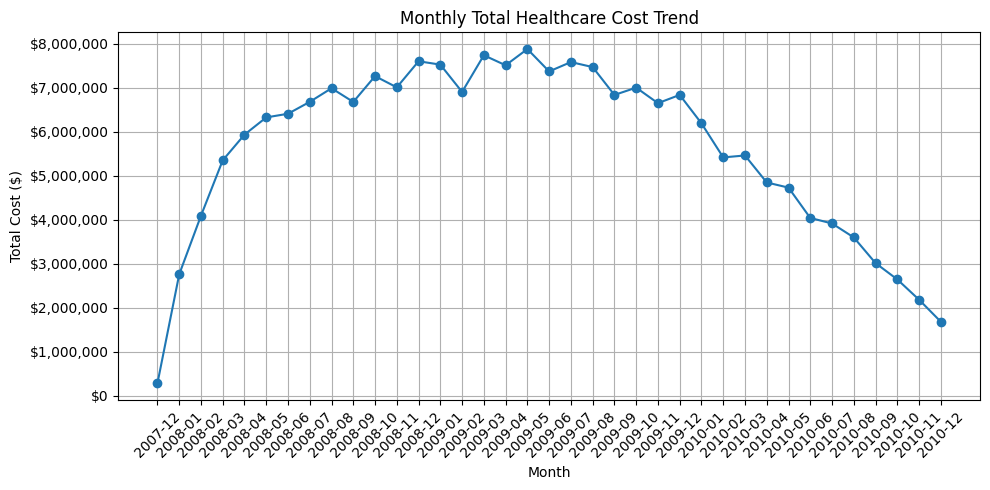

In [116]:
# Monthly trends (total cost and cost per member)
# Create month period from claim start date
df["month"] = df["CLM_FROM_DT"].dt.to_period("M")

monthly_cost = (
    df.groupby("month")["cost"]
      .sum()
      .reset_index()
)

monthly_cost["month"] = monthly_cost["month"].astype(str)

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(10,5))

plt.plot(
    monthly_cost["month"],
    monthly_cost["cost"],
    marker="o"
)

plt.xticks(rotation=45)

plt.title("Monthly Total Healthcare Cost Trend")
plt.xlabel("Month")
plt.ylabel("Total Cost ($)")

plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

plt.grid(True)
plt.tight_layout()
plt.show()


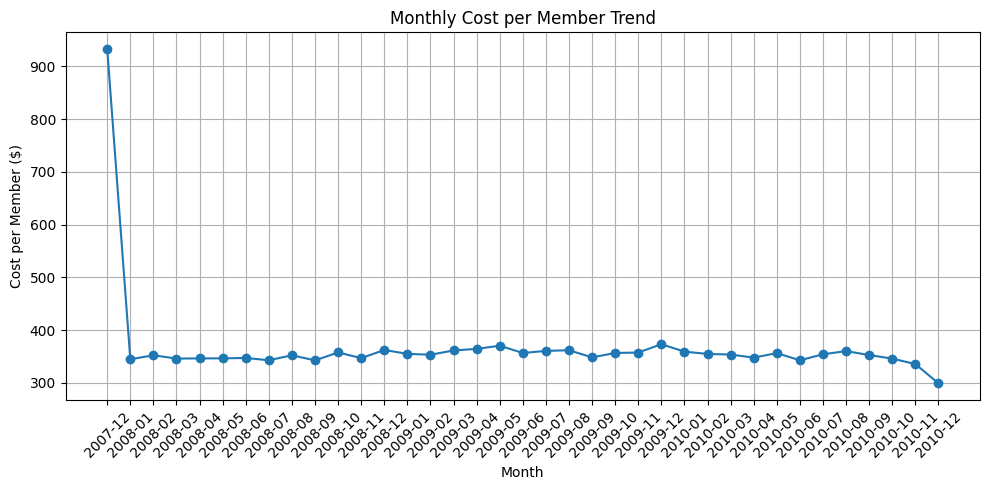

In [117]:
# Cost per member trend per month
monthly_pm = (
    df.groupby("month")
      .agg(
          total_cost=("cost","sum"),
          members=("DESYNPUF_ID","nunique")
      )
      .reset_index()
)

monthly_pm["cost_per_member"] = (
    monthly_pm["total_cost"] / monthly_pm["members"]
)

monthly_pm["month"] = monthly_pm["month"].astype(str)

plt.figure(figsize=(10,5))

plt.plot(
    monthly_pm["month"],
    monthly_pm["cost_per_member"],
    marker="o"
)

plt.xticks(rotation=45)

plt.title("Monthly Cost per Member Trend")
plt.xlabel("Month")
plt.ylabel("Cost per Member ($)")
plt.grid(True)

plt.tight_layout()
plt.show()


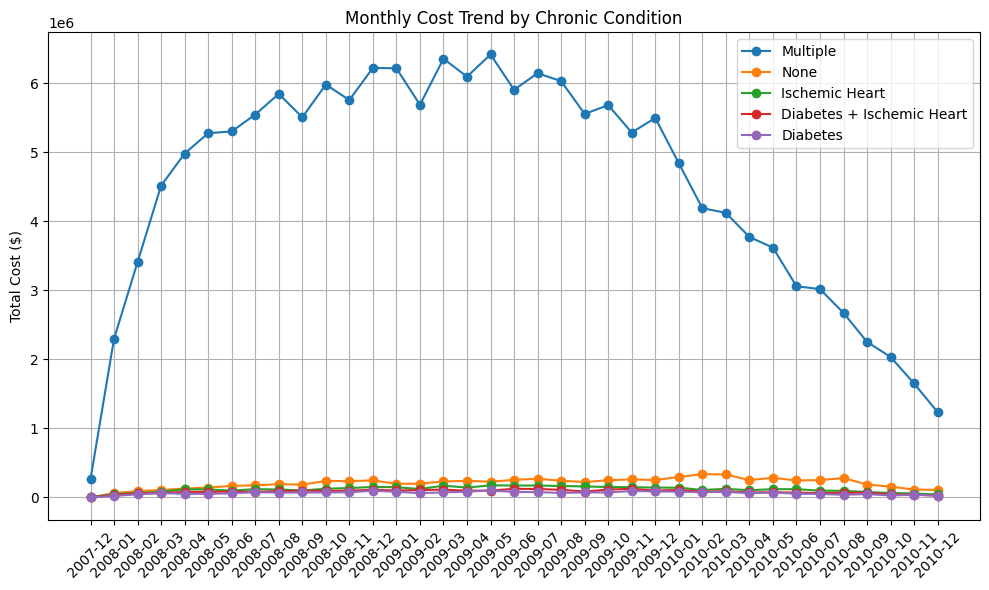

In [118]:
# Monthly cost trends by top chronic combos
top_combos = bene["chronic_combo"].value_counts().head(5).index

trend_combo = (
    df[df["chronic_combo"].isin(top_combos)]
      .groupby(["month","chronic_combo"])["cost"]
      .sum()
      .reset_index()
)

trend_combo["month"] = trend_combo["month"].astype(str)

plt.figure(figsize=(10,6))

for combo in top_combos:
    sub = trend_combo[trend_combo["chronic_combo"] == combo]
    plt.plot(sub["month"], sub["cost"], marker="o", label=combo)

plt.legend()
plt.xticks(rotation=45)

plt.title("Monthly Cost Trend by Chronic Condition")
plt.ylabel("Total Cost ($)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [119]:
# Member counts by age group + chronic combo
# Only merge age (chronic_combo is already present in df)
df_age_combo = df.merge(
    bene[["DESYNPUF_ID","age"]],
    on="DESYNPUF_ID",
    how="left"
)


df_age_combo["age_group"] = pd.cut(
    df_age_combo["age"],
    bins=[65,70,75,80,85,90,100],
    labels=["65-69","70-74","75-79","80-84","85-89","90+"]
)

# Unique members by age group and chronic combo
age_combo = (
    df_age_combo.groupby(["age_group","chronic_combo"])["DESYNPUF_ID"]
      .nunique()
      .reset_index(name="members")
)

age_combo.head(10)


/tmp/ipython-input-3932082131.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_combo.groupby(["age_group","chronic_combo"])["DESYNPUF_ID"]


,age_group,chronic_combo,members
0,65-69,Alzheimer,223
1,65-69,Alzheimer + CHF,69
2,65-69,Alzheimer + COPD,10
3,65-69,Alzheimer + Cancer,11
4,65-69,Alzheimer + Chronic Kidney,14
5,65-69,Alzheimer + Depression,55
6,65-69,Alzheimer + Diabetes,91
7,65-69,Alzheimer + Ischemic Heart,144
8,65-69,Alzheimer + Osteoporosis,34
9,65-69,Alzheimer + RA/OA,16


In [120]:
# Chronic condition co-occurrence correlation

# Build a 0/1 matrix of chronic conditions and compute correlation
cond = bene[chronic_cols].copy()

# Correlation matrix
corr = cond.corr()

corr.head()


,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA
SP_ALZHDMTA,1.000000,0.309290,0.276692,0.117073,0.246337,0.267305,0.328414,0.307531,0.173445,0.188093,0.169207
SP_CHF,0.309290,1.000000,0.396661,0.154759,0.337875,0.285413,0.437869,0.452237,0.213928,0.247339,0.179486
SP_CHRNKIDN,0.276692,0.396661,1.000000,0.164507,0.324929,0.262242,0.417844,0.369571,0.189859,0.237789,0.192374
SP_CNCR,0.117073,0.154759,0.164507,1.000000,0.152175,0.111293,0.174218,0.178848,0.102807,0.114243,0.069676
SP_COPD,0.246337,0.337875,0.324929,0.152175,1.000000,0.243799,0.325596,0.311072,0.169312,0.199333,0.163550


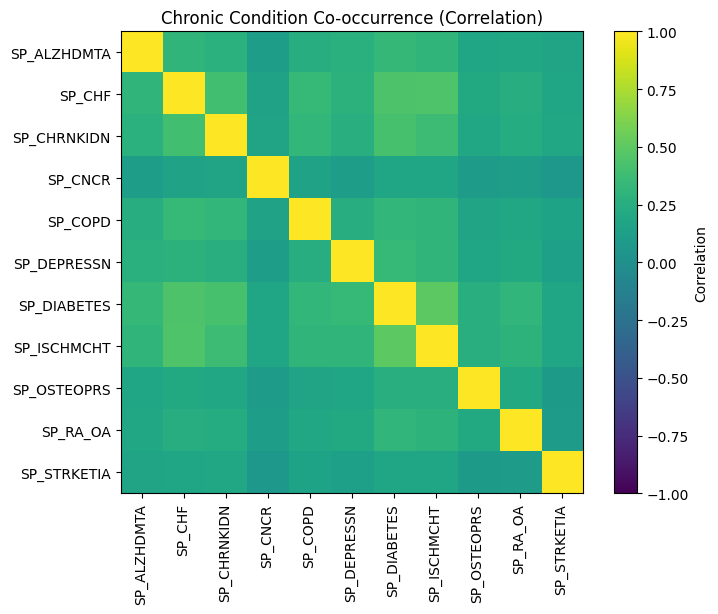

In [121]:
plt.figure(figsize=(8,6))

plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(label="Correlation")

plt.xticks(range(len(chronic_cols)), chronic_cols, rotation=90)
plt.yticks(range(len(chronic_cols)), chronic_cols)

plt.title("Chronic Condition Co-occurrence (Correlation)")
plt.show()


In [122]:
# Conditional probability example
# P(Alzheimer | Cancer)
cancer = bene["SP_CNCR"] == 1
alz = bene["SP_ALZHDMTA"] == 1

prob = (alz & cancer).sum() / cancer.sum()

print("P(Alzheimer | Cancer) =", round(prob,3))


P(Alzheimer | Cancer) = 0.397


In [123]:
import pandas as pd

import itertools

# chronic columns
chronic_cols = [
    "SP_ALZHDMTA","SP_CHF","SP_CHRNKIDN","SP_CNCR","SP_COPD",
    "SP_DEPRESSN","SP_DIABETES","SP_ISCHMCHT","SP_OSTEOPRS","SP_RA_OA","SP_STRKETIA"
]

pretty = {
    "SP_ALZHDMTA":"Alzheimer",
    "SP_CHF":"CHF",
    "SP_CHRNKIDN":"Chronic Kidney",
    "SP_CNCR":"Cancer",
    "SP_COPD":"COPD",
    "SP_DEPRESSN":"Depression",
    "SP_DIABETES":"Diabetes",
    "SP_ISCHMCHT":"Ischemic Heart",
    "SP_OSTEOPRS":"Osteoporosis",
    "SP_RA_OA":"RA/OA",
    "SP_STRKETIA":"Stroke/TIA",
}


# Pairwise co-occurrence probabilities P(B | A)
# for all ordered condition pairs
pairs = []

for A, B in itertools.permutations(chronic_cols, 2):

    a = bene[A] == 1
    b = bene[B] == 1

    if a.sum() > 0:
        prob = (a & b).sum() / a.sum()

        pairs.append([
            pretty[A],
            pretty[B],
            prob
        ])

pair_df = pd.DataFrame(
    pairs,
    columns=["Given Disease (A)", "Also Has (B)", "P(B | A)"]
)

pair_df = pair_df.sort_values("P(B | A)", ascending=False)

pair_df.head(10)


,Given Disease (A),Also Has (B),P(B | A)
107,Stroke/TIA,Ischemic Heart,0.848697
26,Chronic Kidney,Ischemic Heart,0.839382
46,COPD,Ischemic Heart,0.838142
25,Chronic Kidney,Diabetes,0.819682
97,RA/OA,Ischemic Heart,0.796485
106,Stroke/TIA,Diabetes,0.793754
16,CHF,Ischemic Heart,0.792104
45,COPD,Diabetes,0.788526
36,Cancer,Ischemic Heart,0.779692
66,Diabetes,Ischemic Heart,0.773394


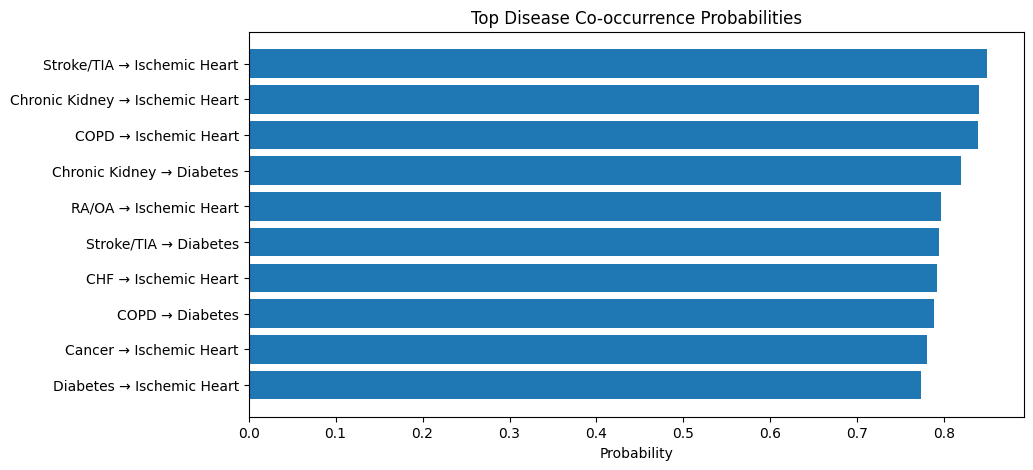

In [124]:
# Plot: Top 10 conditional probabilities
top_pairs = pair_df.head(10).copy()

labels = top_pairs["Given Disease (A)"] + " → " + top_pairs["Also Has (B)"]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.barh(labels, top_pairs["P(B | A)"])

plt.xlabel("Probability")
plt.title("Top Disease Co-occurrence Probabilities")

plt.gca().invert_yaxis()

plt.show()


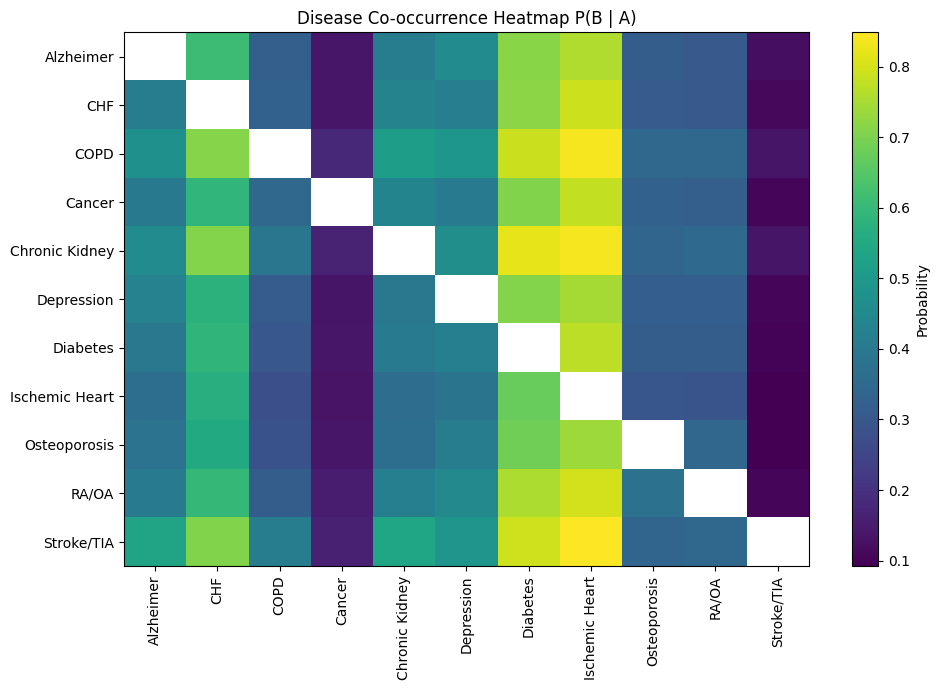

In [125]:
# Heatmap: full pairwise P(B | A)
heat = pair_df.pivot(
    index="Given Disease (A)",
    columns="Also Has (B)",
    values="P(B | A)"
)

plt.figure(figsize=(10,7))

plt.imshow(heat, aspect="auto")

plt.colorbar(label="Probability")

plt.xticks(range(len(heat.columns)), heat.columns, rotation=90)
plt.yticks(range(len(heat.index)), heat.index)

plt.title("Disease Co-occurrence Heatmap P(B | A)")

plt.tight_layout()
plt.show()


In [126]:
#df.to_csv("claims_clean.csv", index=False)
#prov_combo.to_csv("provider_costs.csv", index=False)
#provider_score.to_csv("provider_scores.csv", index=True)


In [127]:
#from google.colab import files

#files.download("claims_clean.csv")
#files.download("provider_costs.csv")
#files.download("provider_scores.csv")
